Hello! 

This is the challenge I completed for the credit card default project. 

It is completed following the guidiance

o Data Visualization/Exploration

o Implemented data pre-processing steps.
  1. Normalize numerical columns to [0,1]
  2. Created dummy variables for categorical variables(X2, X3, X4).   
  3. Tried under sampling and over sampling to pre-process the data.(Could have try oversample and undersample together if have more time)
  4. columns X6-X11 are [-2,8], the meaning of these numbers are not very clear. Could do more feature engineering if I can get a deeper understanding on them.  Now they are treated as continous numerical variable, but I fill it may make more sense to treat them categorically
  
o Explored models that are appropriate for this use case.
  The task is too estimate the probability of default. Not a pure binary classification problem.  But I still first implement binary classification to test undersampling and oversampling, and get some metrics.  This is to ensure identifying default is doable for this dataset. Otherwise, getting probability makes no sense
  
o Fit selected model to the analytics ready dataset. List outcomes from model fitting.
  I explored'LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier',
  'GradientBoostingClassifier' for classfication. Due to the time limitation, I didnot try other methods, such as ANN, KNN. 
  Finally, I use logisticRegression to output probability of default on test data set. Because the F1-score for default is not   as high as nondefault, only around 0.52(GBoost).  So, I think, in real world application, we can manually adjust the boundary   of non default vs default to be P = less than 0.5, to increase recall 
  
o Evaluate model performance on held-out/testing dataset.
    On held-out for test. F1 score, accuracy are all reported.  
    If under sampling, F1 can be balanced to be 0.7 for both default and nondefault, accuracy also around 0.71
    If over sampling, F1 is high 0.87 for nondefault, 0.52 for default, accuracy is around 0.81
    
o What other options would you’ve considered (in solving the problem), if you had additional time?
    I only have a day this project, a lot more can be done to improve the model
    1. Could do more feature engineering. I didnot handle X5-X11 at all, which could be important 
    2. The parameters are not optimized yet. Gridsearch takes too long   
    3. I also could try ANN, KNN, Naive Bayes
    4. For the simplicity of geting probability, I only used logistic regression to estimate probablity of default
    
Thank you very much for the invitation!
Best
Ye Yuan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_excel('default of credit card clients.xls')
dataset = dataset.iloc[1:] #remove description(row1) in dataframe 
dataset = dataset.reset_index(drop=True)
dataset.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [4]:
dataset.shape

(30000, 24)

In [5]:
dataset.info()  # data type 'object' needs converting to int 
dataset = dataset.astype(str).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
X1     30000 non-null object
X2     30000 non-null object
X3     30000 non-null object
X4     30000 non-null object
X5     30000 non-null object
X6     30000 non-null object
X7     30000 non-null object
X8     30000 non-null object
X9     30000 non-null object
X10    30000 non-null object
X11    30000 non-null object
X12    30000 non-null object
X13    30000 non-null object
X14    30000 non-null object
X15    30000 non-null object
X16    30000 non-null object
X17    30000 non-null object
X18    30000 non-null object
X19    30000 non-null object
X20    30000 non-null object
X21    30000 non-null object
X22    30000 non-null object
X23    30000 non-null object
Y      30000 non-null object
dtypes: object(24)
memory usage: 5.5+ MB


In [6]:
dataset.Y.value_counts()  # data is a little biased,more non default than default. over/under sampling may be necessary

0    23364
1     6636
Name: Y, dtype: int64

In [7]:
default = dataset[dataset['Y']==1]
non_default = dataset[dataset['Y']==0]

print("percentage of default is", len(default) / len(dataset['Y']) * 100)
print("percentage of non default is", len(non_default) / len(dataset['Y']) * 100)

percentage of default is 22.12
percentage of non default is 77.88000000000001


Data Visualization/Exploration

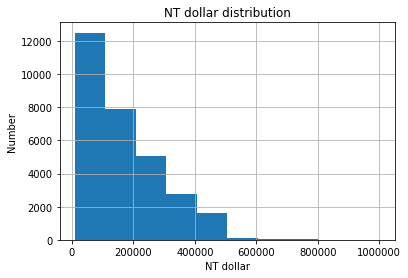

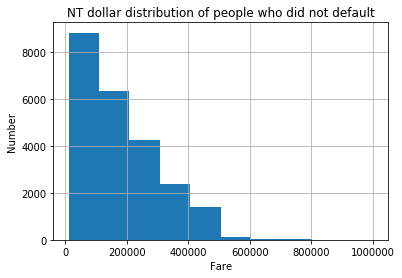

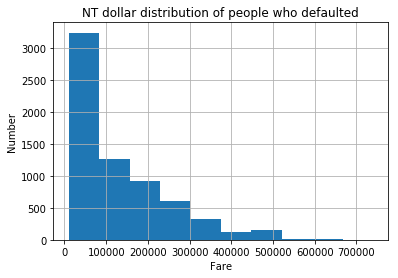

In [8]:
dataset['X1'].hist()  
plt.ylabel("Number") 
plt.xlabel("NT dollar") 
plt.title('NT dollar distribution')
plt.show() 

dataset[dataset.Y==0]['X1'].hist()  
plt.ylabel("Number") 
plt.xlabel("Fare") 
plt.title('NT dollar distribution of people who did not default')
plt.show()

dataset[dataset.Y==1]['X1'].hist()  
plt.ylabel("Number") 
plt.xlabel("Fare") 
plt.title('NT dollar distribution of people who defaulted')
plt.show()

people with lower NT dollar is more likely to default

check X2: gender

   male  female
0  9015   14349
1  2873    3763


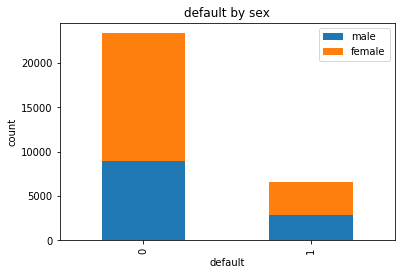

      male%   female%
0  0.758328  0.792237
1  0.241672  0.207763


In [9]:
default_male = dataset.Y[dataset.X2 == 1].value_counts()
default_female = dataset.Y[dataset.X2 == 2].value_counts()
df=pd.DataFrame({'male':default_male, 'female':default_female})
print(df)
df.plot(kind='bar', stacked=True)
plt.title("default by sex")
plt.xlabel("default") 
plt.ylabel("count")
plt.show()
default_male = dataset.Y[dataset.X2 == 1].value_counts()/len(dataset.Y[dataset.X2 == 1])
default_female = dataset.Y[dataset.X2 == 2].value_counts()/len(dataset.Y[dataset.X2 == 2])
df2=pd.DataFrame({'male%':default_male, 'female%':default_female})
print(df2)

male is slightly more likely to default, 24% VS 21%

Check X3, education level

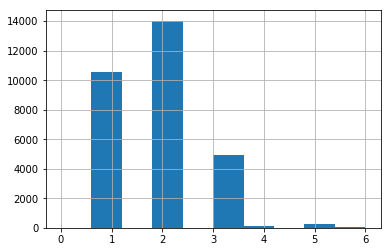

   graduate  university  high school  others  unknow1  unknow2  unknow3
0      8549       10700         3680     116     14.0      262       43
1      2036        3330         1237       7      NaN       18        8


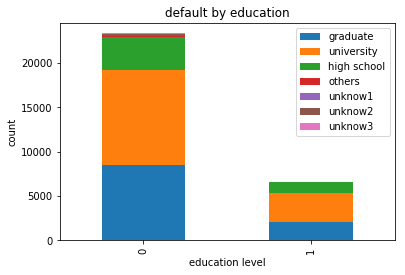

   graduate%  university%  high school%   others%  unknow1%  unknow2%  \
0   0.807652     0.762651      0.748424  0.943089       1.0  0.935714   
1   0.192348     0.237349      0.251576  0.056911       NaN  0.064286   

   unknow3%  
0  0.843137  
1  0.156863  


In [10]:
dataset['X3'].hist()  
plt.show()

default_unknow1 = dataset.Y[dataset['X3'] == 0].value_counts()
default_grad = dataset.Y[dataset['X3'] == 1].value_counts()
default_univ = dataset.Y[dataset['X3'] == 2].value_counts()
default_high = dataset.Y[dataset['X3'] == 3].value_counts()
default_other = dataset.Y[dataset['X3'] == 4].value_counts()
default_unknow2 = dataset.Y[dataset['X3'] == 5].value_counts()
default_unknow3 = dataset.Y[dataset['X3'] == 6].value_counts()

df=pd.DataFrame({'graduate':default_grad, 'university':default_univ, 'high school':default_high,'others':default_other,
                'unknow1':default_unknow1,'unknow2':default_unknow2,'unknow3':default_unknow3,})

print(df)

df.plot(kind='bar', stacked=True)
plt.title("default by education")
plt.xlabel("education level") 
plt.ylabel("count")
plt.show()

default_unknow1 = dataset.Y[dataset['X3'] == 0].value_counts()/len(dataset.Y[dataset.X3 == 0])
default_grad = dataset.Y[dataset['X3'] == 1].value_counts()/len(dataset.Y[dataset.X3 == 1])
default_univ = dataset.Y[dataset['X3'] == 2].value_counts()/len(dataset.Y[dataset.X3 == 2])
default_high = dataset.Y[dataset['X3'] == 3].value_counts()/len(dataset.Y[dataset.X3 == 3])
default_other = dataset.Y[dataset['X3'] == 4].value_counts()/len(dataset.Y[dataset.X3 == 4])
default_unknow2 = dataset.Y[dataset['X3'] == 5].value_counts()/len(dataset.Y[dataset.X3 == 5])
default_unknow3 = dataset.Y[dataset['X3'] == 6].value_counts()/len(dataset.Y[dataset.X3 == 6])

df=pd.DataFrame({'graduate%':default_grad, 'university%':default_univ, 'high school%':default_high,'others%':default_other,
                'unknow1%':default_unknow1,'unknow2%':default_unknow2,'unknow3%':default_unknow3,})

print(df)

default%, high school (slightly)> univeristy (slightly)> graduate >> others

Also found few data points with education = 0, 5, 6, not very clear what these labels mean. labeled as 
{unknow1:0},  {unknow2:5}, {unknow3:6}

Check marital status: description shows three categories: 1 = married; 2 = single; 3 = others. But the data has 0,1,2,3. Label 0 = unknown

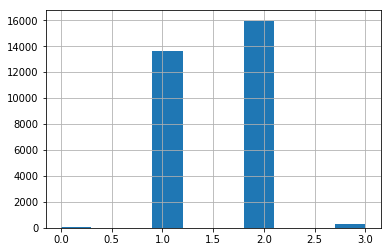

   unknown  married  single  others
0       49    10453   12623     239
1        5     3206    3341      84


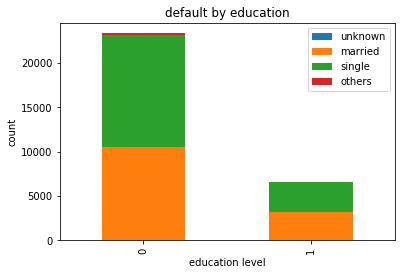

    unknown  married%   single%   others%
0  0.907407  0.765283  0.790717  0.739938
1  0.092593  0.234717  0.209283  0.260062


In [11]:
dataset['X4'].hist()   
plt.show()

default_unknown = dataset.Y[dataset['X4'] == 0].value_counts()
default_m = dataset.Y[dataset['X4'] == 1].value_counts()
default_s = dataset.Y[dataset['X4'] == 2].value_counts()
default_o = dataset.Y[dataset['X4'] == 3].value_counts()


df=pd.DataFrame({'unknown':default_unknown, 'married':default_m, 'single':default_s, 'others':default_o})

print(df)

df.plot(kind='bar', stacked=True)
plt.title("default by education")
plt.xlabel("education level") 
plt.ylabel("count")
plt.show()

default_u = dataset.Y[dataset['X4'] == 0].value_counts()/len(dataset.Y[dataset.X4 == 0])
default_m = dataset.Y[dataset['X4'] == 1].value_counts()/len(dataset.Y[dataset.X4 == 1])
default_s = dataset.Y[dataset['X4'] == 2].value_counts()/len(dataset.Y[dataset.X4 == 2])
default_o = dataset.Y[dataset['X4'] == 3].value_counts()/len(dataset.Y[dataset.X4 == 3])


df=pd.DataFrame({'unknown':default_u,'married%':default_m, 'single%':default_s, 'others%':default_o})

print(df)

default rate, others > single > married > unknown
Also found few data with labeled as 0, not very clear what they means

Check X5: age(year)

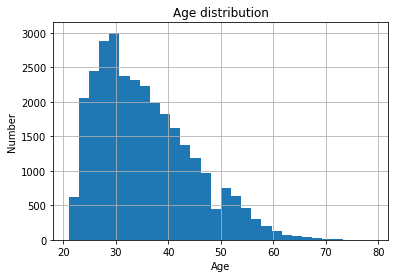

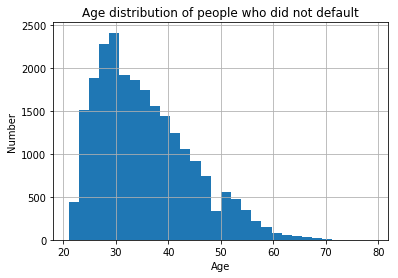

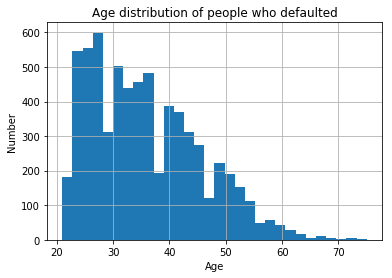

In [12]:
dataset['X5'].hist(bins=30)  
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.title('Age distribution')
plt.show() 

dataset[dataset.Y==0]['X5'].hist(bins=30)  
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.title('Age distribution of people who did not default')
plt.show()

dataset[dataset.Y==1]['X5'].hist(bins=30)  
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.title('Age distribution of people who defaulted')
plt.show()

age 20-28 has higher ratio of default

In [13]:
X = dataset.drop(['Y'], axis = 1) # X is all the features
Y = dataset['Y'] # Y is the label

In [14]:
X_no_normalizatiom = X.loc[:,'X2':'X11']
X_need_normalizatiom = X.drop(X_no_normalizatiom.columns, axis =1)



In [15]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [16]:
from sklearn import preprocessing  # normalize data to [0,1]
names = X_need_normalizatiom.columns
scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(X_need_normalizatiom)
X_need_norm = pd.DataFrame(scaled_df, columns=names)

In [17]:
X_need_norm.head()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.969136,0.189611,0.150313,0.033387,0.000000,0.000000,0.000000,0.000000,0.033387,0.000000,0.000000,0.000000,0.000000
1,0.998005,0.022305,0.014346,0.022305,0.027212,0.028734,0.027121,0.000000,0.008317,0.008317,0.008317,0.000000,0.016633
2,0.898265,0.291826,0.140000,0.135329,0.143034,0.149192,0.155190,0.015151,0.014971,0.009981,0.009981,0.009981,0.049904
3,0.456620,0.429132,0.440483,0.450145,0.258575,0.264465,0.269835,0.018265,0.018438,0.010959,0.010046,0.009763,0.009132
4,0.615783,0.106124,0.069830,0.441332,0.257890,0.235796,0.235611,0.024631,0.451751,0.123157,0.110841,0.008485,0.008362


In [18]:
X = dataset.drop(['Y'], axis = 1) # X is all the features
Y = dataset['Y'] # Y is the label
#convert categorical features: X2, X3, X4 into dummy variables(one-hot encoding)
dummies_gender = pd.get_dummies(X['X2'],prefix=['gender'], drop_first=True)
dummies_edu = pd.get_dummies(X['X3'],prefix=['edu'], drop_first=True)
dummies_marital = pd.get_dummies(X['X4'],prefix=['marital'], drop_first=True)
raw = pd.concat([X_need_norm,X_no_normalizatiom,dummies_gender,dummies_edu,dummies_marital], axis=1)
X = raw.drop(['X2','X3','X4'], axis=1) # drop dependent variables


In [19]:
X.shape

(30000, 30)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # train/test split. set 20% data for test. 80% data for training

Going to train and test on different models

In [21]:
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score, classification_report


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score, classification_report

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

scores = []

classifiers = {'LogisticRegression': LogisticRegression(),
               'DecisionTreeClassifier': DecisionTreeClassifier(), 
               'RandomForestClassifier': RandomForestClassifier(),
               'AdaBoostClassifier': AdaBoostClassifier(), 
               'GradientBoostingClassifier': GradientBoostingClassifier()}

for key, classifier in classifiers.items():
    print(key)
    classifier.fit(X_train, Y_train.values.ravel())
    classifier_pred = classifier.predict(X_test)
    print(classification_report(Y_test, classifier_pred))
    print(confusion_matrix(Y_test, classifier_pred))
    print(accuracy_score(Y_test, classifier_pred))


LogisticRegression
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4663
           1       0.70      0.22      0.33      1337

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.61      6000
weighted avg       0.79      0.81      0.76      6000



C:\Users\Yuan's\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[4540  123]
 [1045  292]]
0.8053333333333333
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4663
           1       0.38      0.39      0.38      1337

    accuracy                           0.72      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.72      0.72      0.72      6000

[[3807  856]
 [ 817  520]]
0.7211666666666666
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.66      0.36      0.47      1337

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.79      6000

[[4411  252]
 [ 853  484]]
0.8158333333333333
AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4663
           1       0.68      0.29 

althrough the accuracy_score is >0.8 for most models.  
F1-score for default is very poor. model cannot capture default cases well. 
This is because the data set has 78% non default.  The model under look default cases. 
Need under sampling or over sampling


Next, I undersampling the Majority Class(non-default), to make 50%/50% default/nondefault dataset

In [23]:
dataset = pd.concat([X, Y], axis = 1)
dataset = dataset.sample(frac=1) # shuffle the data
default_df = dataset.loc[dataset['Y'] == 1]
non_default_df = dataset.loc[dataset['Y'] == 0][:len(dataset[dataset['Y'] == 1])]

normal_distributed_df = pd.concat([default_df, non_default_df])

# shuffle the rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
print(new_df.shape)
new_df.head()

(13272, 31)


,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,['edu']_1,['edu']_2,['edu']_3,['edu']_4,['edu']_5,['edu']_6,['marital']_1,['marital']_2,['marital']_3,Y
5078,0.731002,0.269886,0.306173,0.276933,0.275018,0.265836,0.271363,0.041126,0.018845,0.009620,...,0,1,0,0,0,0,0,0,1,1
18816,0.891677,0.174588,0.143851,0.113634,-0.017659,0.205500,0.173077,0.006369,0.006369,0.000386,...,0,1,0,0,0,0,0,1,0,0
4075,0.581515,0.526426,0.538628,0.146910,0.149740,0.154421,0.155991,0.026847,0.012357,0.005272,...,0,1,0,0,0,0,1,0,0,1
3850,0.512849,0.505177,0.454651,0.407090,0.301781,0.131864,0.000000,0.015601,0.013796,0.021273,...,1,0,0,0,0,0,1,0,0,1
23855,0.428413,0.392991,0.394977,0.362675,0.354910,0.348383,0.354783,0.015416,0.015069,0.015063,...,0,1,0,0,0,0,0,1,0,0


In [24]:
X_under = new_df.drop('Y', axis=1)
Y_under = new_df['Y']
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, Y_under, test_size=0.2, random_state=42)

In [25]:
scores = []

classifiers = {'LogisticRegression': LogisticRegression(solver='liblinear'),
               'DecisionTreeClassifier': DecisionTreeClassifier(), 
               'RandomForestClassifier': RandomForestClassifier(),
               'AdaBoostClassifier': AdaBoostClassifier(), 
               'GradientBoostingClassifier': GradientBoostingClassifier()}
for key, classifier in classifiers.items():
    print(key)
    classifier.fit(X_train_under, y_train_under.values.ravel())
    training_score = cross_val_score(classifier, X_train_under, y_train_under.values.ravel(), cv=5, scoring='f1')
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% f1 score")
    

for key, classifier in classifiers.items():
    print(key)
    classifier.fit(X_train_under, y_train_under.values.ravel())
    classifier_pred = classifier.predict(X_test_under)
    print(classification_report(y_test_under, classifier_pred))
    print(confusion_matrix(y_test_under, classifier_pred))
    print(accuracy_score(y_test_under, classifier_pred))

LogisticRegression
Classifiers:  LogisticRegression has a training score of 66.0 % f1 score
DecisionTreeClassifier
Classifiers:  DecisionTreeClassifier has a training score of 62.0 % f1 score
RandomForestClassifier
Classifiers:  RandomForestClassifier has a training score of 67.0 % f1 score
AdaBoostClassifier
Classifiers:  AdaBoostClassifier has a training score of 67.0 % f1 score
GradientBoostingClassifier
Classifiers:  GradientBoostingClassifier has a training score of 68.0 % f1 score
LogisticRegression
              precision    recall  f1-score   support

           0       0.67      0.74      0.71      1345
           1       0.70      0.63      0.66      1310

    accuracy                           0.69      2655
   macro avg       0.69      0.69      0.69      2655
weighted avg       0.69      0.69      0.69      2655

[[998 347]
 [485 825]]
0.6866290018832392
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.61      0.59      0.6

With under sampling, F1 score on default increases significantly to around 0.7. But the overall accuracy dropped to around 0.72
RandomForest, adaboost, and GB perform roughly 0.7 F1 score on both default and non-default test set
Could further improve by GridSearch. Due to time limitation. I only GridSearched Gradient Boosting  
I am also going to explore over-sampling

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Gradient Boosting Classifier 
# killed because takes too long
gb_params = { "learning_rate": [0.01,0.05,0.1,0.3],
              "max_features":["log2","sqrt"],
              "criterion": ["friedman_mse",  "mae"]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), gb_params, scoring='f1')
grid_gb.fit(X_train_under, y_train_under)
param_gb = grid_gb.best_estimator_
print(grid_gb.best_params_)
pred_under_gb = param_gb.predict(X_test_under)
print(f1_score(y_test_under, pred_under_gb))
print(confusion_matrix(y_test_under, pred_under_gb))

KeyboardInterrupt: 

Grid search takes too long on my PC, so I was not able to optimize these parameters. The highest F1-score I obtain is around 0.69

Next, I oversampling the minor Class(default), to make 50%/50% default/nondefault dataset

In [29]:
from imblearn.over_sampling import SMOTE # require imblearn. conda install -c conda-forge imbalanced-learn

Using TensorFlow backend.


In [30]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X, Y, test_size=0.1, random_state=42)

In [31]:
print("Before OverSampling, counts of label '1': {}".format(len(y_train_over[y_train_over == 1])))
print("Before OverSampling, counts of label '0': {} \n".format(len(y_train_over[y_train_over == 0])))

sm = SMOTE(random_state=2)
X_train_over, y_train_over = sm.fit_sample(X_train_over, y_train_over)
print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))


Before OverSampling, counts of label '1': 5977
Before OverSampling, counts of label '0': 21023 

After OverSampling, the shape of train_X: (42046, 30)
After OverSampling, the shape of train_y: (42046,) 



In [32]:
scores = []

classifiers = {'LogisticRegression': LogisticRegression(solver='liblinear'),
               'DecisionTreeClassifier': DecisionTreeClassifier(), 
               'RandomForestClassifier': RandomForestClassifier(),
               'AdaBoostClassifier': AdaBoostClassifier(), 
               'GradientBoostingClassifier': GradientBoostingClassifier()}
for key, classifier in classifiers.items():
    print(key)
    classifier.fit(X_train_over, y_train_over)
    training_score = cross_val_score(classifier, X_train_over, y_train_over, cv=5, scoring='f1')
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% f1 score")
for key, classifier in classifiers.items():
    print(key)
    classifier.fit(X_train_over, y_train_over)
    classifier_pred = classifier.predict(X_test_over)
    print(classification_report(y_test_over, classifier_pred))
    print(confusion_matrix(y_test_over, classifier_pred))

LogisticRegression
Classifiers:  LogisticRegression has a training score of 65.0 % f1 score
DecisionTreeClassifier
Classifiers:  DecisionTreeClassifier has a training score of 76.0 % f1 score
RandomForestClassifier
Classifiers:  RandomForestClassifier has a training score of 84.0 % f1 score
AdaBoostClassifier
Classifiers:  AdaBoostClassifier has a training score of 71.0 % f1 score
GradientBoostingClassifier
Classifiers:  GradientBoostingClassifier has a training score of 75.0 % f1 score
LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      2341
           1       0.40      0.63      0.49       659

    accuracy                           0.71      3000
   macro avg       0.64      0.68      0.64      3000
weighted avg       0.77      0.71      0.73      3000

[[1705  636]
 [ 243  416]]
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      2341
   

With over sampling, GB(without optimization) gives a accuracy of around 0.81, and the F1-score is 0.88, 0.52 for non-default and default cases on held-out data set.  So I think over sampling give a good overall performation for this data set.
If I have more time, I may try a combination of over sampling and under sampling

I will go ahead to estimate the probability of default using the over-sampled data set. 
I plan to use logistic regression, as it is the most convenient model to get problably (it is about 1 am, I think one day is not enough at all for this project...) 

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

lr_params = {"penalty": ['l1', 'l2'], 
             'C': [0.01, 0.1, 1]}
grid_lr_over = GridSearchCV(LogisticRegression(solver='liblinear'), lr_params)
grid_lr_over.fit(X_train_over, y_train_over)
param_lr_over = grid_lr_over.best_estimator_
print(grid_lr_over.best_params_)
param_lr_score_over = param_lr_over.predict(X_train_over)
print(classification_report(y_train_over, param_lr_score_over))
oversampling_train_f1 = f1_score(y_train_over, param_lr_score_over)
print(oversampling_train_f1)

{'C': 0.1, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.65      0.78      0.71     21023
           1       0.72      0.59      0.65     21023

    accuracy                           0.68     42046
   macro avg       0.69      0.68      0.68     42046
weighted avg       0.69      0.68      0.68     42046

0.6478155849611426


In [34]:
probility_of_default = param_lr_over.predict_proba(X_test_over)
print(probility_of_default)

[[0.61870736 0.38129264]
 [0.63094536 0.36905464]
 [0.49953234 0.50046766]
 ...
 [0.56511637 0.43488363]
 [0.63479504 0.36520496]
 [0.5642404  0.4357596 ]]
